In [2]:
import numpy             as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import scipy.integrate as integrate
import matplotlib.animation as anim
from statistics import mode

In [8]:
n = 10
r = 7
def prior(p):
    return np.where(np.logical_and(p >= 0, p <= 1), 1, 0)
def Likelihood(p, r, n):
    return np.power(p,r)*np.power(1-p,n-r)
def Posterior(p,r,n):
    return Likelihood(p,r,n)*prior(p)

In [10]:
def Metropolis(x0, Posterior, NSteps=int(1e4), delta=0.4):
    x = np.zeros((NSteps, 1))
    x[0] = x0
    
    for i in tqdm(range(1, NSteps)):
        P0 = Posterior(x[i - 1], r, n)
        xf = x[i - 1] + delta * 2 * (np.random.rand() - 0.5)
        P1 = Posterior(xf, r, n)
        
        alpha = np.minimum(1, P1 / P0)
        g = np.random.rand()
        
        if alpha > g:
            x[i, 0] = xf
        else:
            x[i, :] = x[i - 1, :]
            
    return x[1000:, :]
initparams = np.array([0.2])
MCMC = Metropolis(initparams,Posterior)

100%|██████████| 9999/9999 [00:00<00:00, 10457.30it/s]


(array([0.02770036, 0.01385018, 0.        , 0.        , 0.02770036,
        0.        , 0.01385018, 0.        , 0.04155054, 0.16620214,
        0.01385018, 0.1939025 , 0.04155054, 0.06925089, 0.11080143,
        0.02770036, 0.11080143, 0.29085375, 0.42935553, 0.36010464,
        0.1939025 , 0.26315339, 0.34625446, 0.22160286, 0.41550535,
        0.45705589, 0.63710821, 0.33240428, 0.77561   , 0.55400714,
        0.5817075 , 0.76175982, 0.62325803, 0.87256125, 1.0941641 ,
        0.74790964, 0.92796196, 1.30191678, 1.06646374, 1.13571464,
        1.27421642, 1.02491321, 1.39886803, 1.53736981, 1.85592392,
        1.68972178, 2.31297981, 1.71742213, 1.84207374, 2.1883282 ,
        2.02212606, 2.03597624, 2.79773606, 2.88083713, 2.89468731,
        2.17447802, 2.5761332 , 2.02212606, 2.63153391, 2.95008802,
        2.92238766, 3.06088945, 3.60104641, 2.72848516, 2.97778838,
        2.75618552, 3.54564569, 3.33789302, 3.94730087, 3.54564569,
        2.22987874, 2.40993106, 2.64538409, 2.90

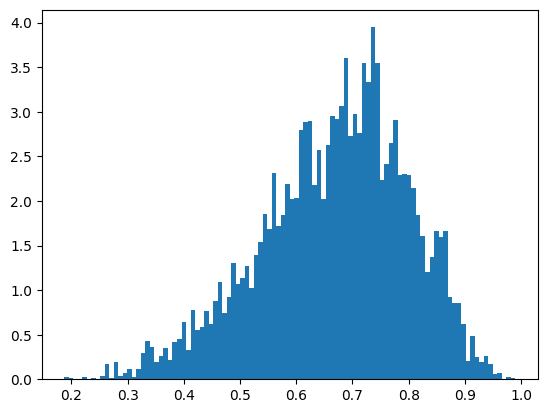

In [11]:
plt.hist(MCMC,density=True,bins=100)

In [12]:
def find_maximum(Pos, p):
    index = np.argmax(Pos)
    x_m = p[index]
    maxi = Pos[index]
    maxx = [x_m, maxi]
    return maxx

lin = np.linspace(0,1,100)
Port = Posterior(p,r,n)
j = find_maximum(Pos,lin)
j

[0.696969696969697, 0.002223081851969984]

La moneda esta trucada


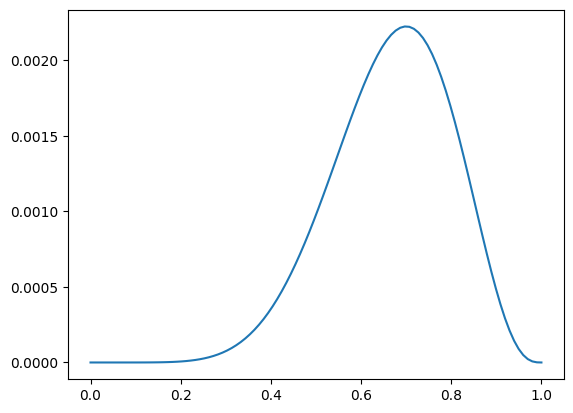

In [15]:
plt.plot(lin,Port)
print("La moneda esta trucada")